<a href="https://colab.research.google.com/github/NusratBegum/Machine-Learning/blob/main/Machine_Learning_Homework4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4.1

The decision function (activation function) of the linear classification model is the sigmoid function as discussed in class. The minimizable error function is defined as follows:

$$ J(\theta) = -\sum_{i=1}^{m} \left( y_i - \sigma(\theta x_i) \right)^2 $$

Derive the gradient of J(θ) the using chain rule.

In [238]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.preprocessing import PolynomialFeatures
import sys
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

# Homework 4.2


Implement Logistic Regression from scratch by the Exercise 2 code of Andrew Ng at

[URL](https://github.com/michaelmorr82/Machine-Learning-Coursera-Andrew-Ng/blob/master/Exercises/Assignment%202%20-%20Logistical%20regression/ex2%20-%20Python/Exercise2%20-%20Logistic%20Regerssion.ipynb)

See this URL below for Andrew Ng’s exercises

[URL](https://github.com/michaelmorr82/Machine-Learning-Coursera-Andrew-Ng/tree/master/Exercises)

Use the Iris dataset and perform logistic regression instead of ex2data1.txt.

Iris dataset: [URL](https://archive.ics.uci.edu/dataset/53/iris) (you can also find it in Kaggle)

Try binary classification using the concept class A vs the others, class B vs the others and class C vs the others.

In [239]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

iris = load_iris()
print(iris)
X = iris.data
y = iris.target
m,n= X.shape
X_with_intercept = np.concatenate([np.ones((m, 1)), X], axis=1)
initial_theta = np.zeros(n + 1)

print('number of features (n): %.0f'%(n))
print('number of examples (m):%.0f\n'%(m))
print('x with intercept:', X_with_intercept)
print('initial theta:',initial_theta)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

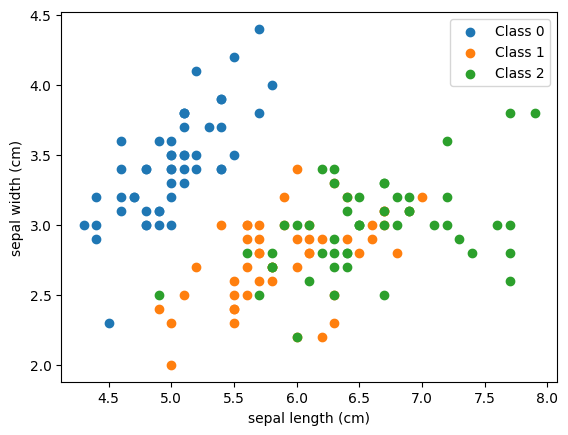

In [240]:
def plotData(X, y, feature_x_index, feature_y_index, feature_names):
    """
    Plots a scatterplot of two features from the Iris dataset, color-coded by the target class.

    Parameters:
    - X: NumPy array containing the features of the Iris dataset.
    - y: NumPy array containing the targets of the Iris dataset.
    - feature_x_index: The index of the feature to be plotted on the x-axis.
    - feature_y_index: The index of the feature to be plotted on the y-axis.
    - feature_names: List of names of the features.
    """
    # Create a DataFrame from the NumPy arrays for easier plotting
    df = pd.DataFrame(X, columns=feature_names)
    df['target'] = y

    # Create a new figure and axis for plotting
    fig, ax = plt.subplots()

    # Get unique classes
    classes = np.unique(y)

    # Plot data points for each class
    for cls in classes:
        subset = df[df['target'] == cls]
        ax.scatter(subset[feature_names[feature_x_index]], subset[feature_names[feature_y_index]], label=f"Class {cls}")

    # Labeling the axes
    ax.set_xlabel(feature_names[feature_x_index])
    ax.set_ylabel(feature_names[feature_y_index])

    # Adding a legend to the plot
    ax.legend()

    # Display the plot
    plt.show()

# Define feature names as per the Iris dataset
feature_names = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Example usage with the indices of the features you want to plot
plotData(X, y, 0, 1, feature_names)

### Logistic regression

Hypothesis:
Sigmoid Function $$h_\theta(x) = g(\theta^{T}x)$$

$$h_\theta(x) = g(\theta x) = \frac{1}{1 + e^{-\theta^{T}x}}$$

Cost Function:
$$J(\theta) = -\frac{1}{m}\sum_{i = 1}^m \Big(y^{(i)}log( h_\theta(x^{(i)})) + (1 - y^{(i)}) log(1 - h_\theta(x^{(i)}))\Big)$$

Vectorised Cost Function:
$$ J(\theta) = -\frac{1}{m}\big(log(h)+(1 - y)^T(log(1 - h)\big)$$
where $$h = g(X\theta)$$

Gradient Descent: Repeat until converge
$$\theta_j : = \theta_j- \frac{\alpha}{m}\frac{\partial J(\theta)}{\partial\theta_{j}}$$


Partial derivative:
j = 0
$$ \frac{\partial J(\theta)}{\partial\theta_{0}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{0} $$

j = 1,2,3...n
$$ \frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$

Vectorized Partial Derivative
$$\frac{\partial J(\theta)}{\partial\theta_{j}} = \frac{1}{m} X^T(h-y)$$


### Sigmoid Function

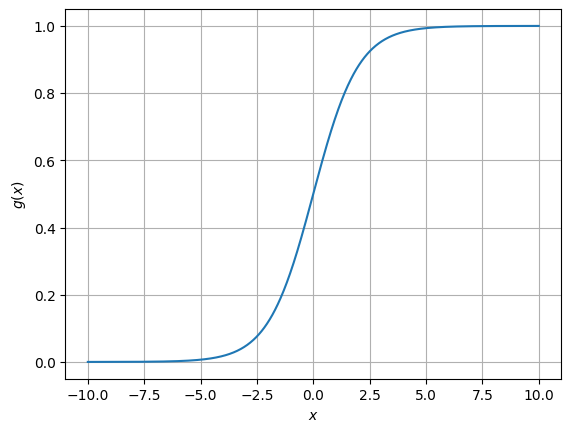

In [241]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.

    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector
        or a 2-D matrix.

    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.

    """
    g = 1 / (1 + np.exp(-z))
    return(g)

# test on a few values
xx = np.linspace(-10, 10, 1000)

# plot sigmoid function vs. x
plt.plot(xx, sigmoid(xx))
plt.xlabel(r'$x$')
plt.ylabel(r'$g(x)$')
plt.grid(True)

In [242]:
def costFunction(theta, X, y):
    """
    Compute cost for logistic regression.

    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).

    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the
        intercept has already been added to the input.

    y : array_like
        Labels for the input. This is a vector of shape (m, ).

    Returns
    -------
    J : float
        The computed value for the cost function.
    """
    m = len(y)  # number of training examples
    h = sigmoid(X @ theta)  # hypothesis

    # Compute the cost
    J = (-1/m) * (np.dot(y, np.log(h)) + np.dot((1 - y), np.log(1 - h)))

    # Check if J is NaN
    if np.isnan(J):
        return np.inf
    return J


def gradient(theta, X, y):
    """
    Compute gradient for logistic regression.

    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).

    X : array_like
        The input dataset of shape (m, n+1) where m is the total number
        of data points and n is the number of features including the intercept.

    y : array_like
        Labels for the input. This is a vector of shape (m, ).

    Returns
    -------
    grad : array_like
        The gradient of the cost with respect to each parameter in theta.
    """
    m = len(y)  # number of training examples
    h = sigmoid(X.dot(theta))
    error = h - y
    grad = (1/m) * X.T.dot(error)

    return grad

initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
dJ = gradient(initial_theta, X, y)

print('values at initial thetas:')
print('\ttheta_0: %.2f'%(initial_theta[0]))
print('\ttheta_1: %.2f'%(initial_theta[1]))
print('\ttheta_2: %.2f'%(initial_theta[2]))
print('Grad Cost: \n\tdtheta_0 = %.3f,\n\tdtheta_1 = %.3f \n\tdtheta = %.3f'%(dJ[0], dJ[1], dJ[2]))
print('Cost of initial thetas: %.3f'%(cost))

values at initial thetas:
	theta_0: 0.00
	theta_1: 0.00
	theta_2: 0.00
Grad Cost: 
	dtheta_0 = -3.449,
	dtheta_1 = -1.377 
	dtheta = -3.242
Cost of initial thetas: 0.693


# Homework 4.3
Using the Iris dataset. Iris dataset: [URL](https://archive.ics.uci.edu/dataset/53/iris) (you can also find it in Kaggle)


Try multiclass classifications using scikit-learn library:

[URL](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

[URL](https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html)

[URL](https://www.kaggle.com/code/rahulrajpandey31/logistic-regression-from-scratch-iris-data-set)


Display the list of predicted class against the actual class for each record in the training dataset.

In [243]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on the training dataset
y_pred_train = model.predict(X_train)

# Displaying the list of predicted class against the actual class for each record in the training dataset
list(zip(y_train, y_pred_train))

[(0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (2, 2),
 (1, 1),
 (1, 1),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (0, 0),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (1, 1),
 (1, 1),
 (2, 2),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (0, 0),
 (1, 1),
 (1, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (0, 0),
 (1, 2),
 (1, 1),
 (2, 2),
 (1, 2),
 (2, 2),
 (2, 2),
 (1, 1),
 (0, 0),
 (0, 0),
 (2, 2),
 (2, 2),
 (0, 0),
 (0, 0),
 (0, 0),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (2, 2),
 (0, 0),
 (1, 1),
 (1, 1),
 (2, 2),
 (1, 1),
 (2, 2),
 (0, 0),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (1, 1),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (0, 0),
 (2, 2),
 (0, 0),
 (1, 1),
 (2, 2),
 (2, 2),
 (1, 1),
 (2, 2),
 (1, 1),
 

# Homework 4.4

Using the Kaggle’s Diabetes prediction dataset

[URL](https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset)

Use scikit-learn logistic regression with regularization to predict whether each record individual has diabetes.

Split the data into training set and test set. Compare and analyze the results against scikit-learn logistic regression without regularization. Which model is better (with or without regularization)?


Use K Fold cross-validation for k = 5 and repeat the task above again.

[URL](https://scikit-learn.org/stable/modules/cross_validation.html)

In [244]:
diabetes_data = pd.read_csv('/diabetes_prediction_dataset.csv')
display(diabetes_data)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [246]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# Encode categorical variables
le = LabelEncoder()
diabetes_data['gender'] = le.fit_transform(diabetes_data['gender'])
diabetes_data['smoking_history'] = le.fit_transform(diabetes_data['smoking_history'])

# Define features and target
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']

# Scaling the features again for clarification
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into a training set and a test set after scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train models again after correcting the scaling issue
logistic_regression_regularized.fit(X_train, y_train)
logistic_regression_no_regularization.fit(X_train, y_train)

# Predict and evaluate again
y_pred_regularized = logistic_regression_regularized.predict(X_test)
y_pred_no_regularization = logistic_regression_no_regularization.predict(X_test)

# Calculate accuracies
accuracy_regularized = accuracy_score(y_test, y_pred_regularized)
accuracy_no_regularization = accuracy_score(y_test, y_pred_no_regularization)

# K-Fold Cross-Validation scores
cv_scores_regularized = cross_val_score(logistic_regression_regularized, X_scaled, y, cv=5)
cv_scores_no_regularization = cross_val_score(logistic_regression_no_regularization, X_scaled, y, cv=5)

accuracy_regularized, accuracy_no_regularization, cv_scores_regularized.mean(), cv_scores_no_regularization.mean()

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:11

(0.9589, 0.9589333333333333, 0.9602299999999999, 0.9602299999999999)

# Homework 4.5

Implementing the perceptron algorithm by following the work here:

[URL](https://www.kaggle.com/code/adibyw/simple-neural-network-for-diabetes-dataset)

Replace the diabetes dataset with Iris dataset for each class vs the others.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset and prepare it
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['label'] = iris.target

# Binary classification: Class 0 vs others
data['binary_label'] = data['label'].apply(lambda x: 1 if x == 0 else 0)

# Normalize features
features = iris.feature_names
data[features] = (data[features] - data[features].min()) / (data[features].max() - data[features].min())

# Training and test split
X = data[features]
y = data['binary_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to values for perceptron input
training = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)

# Perceptron functions
def predict(row, weights):
    activation = weights[0]
    for i in range(len(row)-1):
        activation += weights[i + 1] * row[i]
    return 1.0 if activation >= 0.0 else 0.0

def train_weights(train, l_rate, n_epoch):
    weights = [0.0 for i in range(len(train[0]))]
    for epoch in range(n_epoch):
        for row in train:
            prediction = predict(row, weights)
            error = row[-1] - prediction
            weights[0] += l_rate * error
            for i in range(len(row)-1):
                weights[i + 1] += l_rate * error * row[i]
    return weights

def perceptron(train, test, l_rate, n_epoch):
    predictions = []
    weights = train_weights(train, l_rate, n_epoch)
    for row in test:
        prediction = predict(row, weights)
        predictions.append(prediction)
    return(predictions)

# Execute perceptron
l_rate = 0.1
n_epoch = 50
predicted = perceptron(training.values, test.values, l_rate, n_epoch)

# Print predictions
for i in range(10):
    print(f'Predicted: {predicted[i]}, Actual: {y_test.iloc[i]}')

# Homework 4.6

Compute the confusion matrix, sensitivity and sensitivity for the classification of the diabetics prediction dataset using Perceptron algorithm and Logistic regression algorithm (with and without regularlization)
and analyze which method is better.

In [ ]:
diabetes_data = pd.read_csv('/diabetes_prediction_dataset.csv')
display(diabetes_data)

In [ ]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

# Encode categorical variables
le = LabelEncoder()
diabetes_data['gender'] = le.fit_transform(diabetes_data['gender'])
diabetes_data['smoking_history'] = le.fit_transform(diabetes_data['smoking_history'])

# Define features and target
X = diabetes_data.drop('diabetes', axis=1)
y = diabetes_data['diabetes']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize models
perceptron = Perceptron(tol=1e-3, random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)
logistic_regression_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000, random_state=42)
logistic_regression_l2 = LogisticRegression(penalty='l2', solver='liblinear', max_iter=1000, random_state=42)

# Train models
perceptron.fit(X_train_scaled, y_train)
logistic_regression.fit(X_train_scaled, y_train)
logistic_regression_l1.fit(X_train_scaled, y_train)
logistic_regression_l2.fit(X_train_scaled, y_train)

# Define the evaluate_model function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    sensitivity = recall_score(y_test, y_pred)  # Recall is the same as sensitivity
    specificity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    return cm, sensitivity, specificity

# Evaluate and compare models
results = {}
for model, name in zip([perceptron, logistic_regression, logistic_regression_l1, logistic_regression_l2], models):
    cm, sensitivity, specificity = evaluate_model(model, X_test_scaled, y_test)
    results[name] = {'Confusion Matrix': cm, 'Sensitivity': sensitivity, 'Specificity': specificity}

results